In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import gensim
from nltk.corpus import stopwords
import string
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download("stopwords")
nltk.download('wordnet')
from sklearn.metrics.pairwise import cosine_similarity
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_columns', None)
import ast
from matplotlib import pyplot as plt
import seaborn as sns

c:\users\mittal\appdata\local\programs\python\python37\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\users\mittal\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\users\mittal\appdata\local\programs\python\python37\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Mittal\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
def collection(url,total_loops):
    
    title=[]
    summary=[]
    genre=[]
    ratings=[]
    vote_count=[]
    
    for j in range(total_loops):
        response=requests.get(url)
        soup=BeautifulSoup(response.content,'html.parser')

        movie_data=soup.findAll('div',attrs={'class':'lister-item mode-advanced'})
        for i in movie_data:
            title.append(i.h3.a.text)
            
            summary.append(i.findAll('p',class_='text-muted')[1].text.strip())
            
            genre.append(i.p.find('span',attrs={'class':'genre'}).text.replace(',',' ') if i.p.find('span',attrs={'class':'genre'}) else "unknown")
            
            rate=i.find('div',attrs={'class':'inline-block ratings-imdb-rating'}).strong.text if i.find('div',attrs={'class':'inline-block ratings-imdb-rating'}) else 0
            ratings.append(float(rate))
            
            value=i.findAll('span',attrs={'name':'nv'})
            if (value):
                vote = value[0].text.replace(',','')
                vote_count.append(vote)
            else:
                vote_count.append(0)

            
        if (soup.find('a',attrs={'class':'lister-page-next next-page'})):
            if soup.find('a',attrs={'class':'lister-page-next next-page'}).get('href'):
                url='https://www.imdb.com'+soup.find('a',attrs={'class':'lister-page-next next-page'}).get('href')
            else:
                break
        else:
            break
    
    return title,summary,genre,ratings,vote_count 

In [16]:
titles_2016,overview_2016,genre_2016,ratings_2016,vote_2016=collection('https://www.imdb.com/search/title/?count=100&languages=en&release_date=2016,2016&title_type=feature',20)

In [17]:
print(len(titles_2016),len(overview_2016),len(genre_2016),len(ratings_2016),len(vote_2016))

2000 2000 2000 2000 2000


In [18]:
dataset_for_2016=pd.DataFrame({'genres':genre_2016,'original_title':titles_2016,'overview':overview_2016,'ratings':ratings_2016,'votes':vote_2016})

In [19]:
dataset_for_2016.head()

,genres,original_title,overview,ratings,votes
0,\nAction Adventure Sci-Fi,Batman v Superman: Dawn of Justice,Fearing that the actions of Superman are left ...,6.4,642262
1,\nAction Adventure Fantasy,Suicide Squad,A secret government agency recruits some of th...,6.0,611523
2,\nAction Adventure Sci-Fi,Captain America: Civil War,Political involvement in the Avengers' affairs...,7.8,675546
3,\nComedy Drama,Captain Fantastic,"In the forests of the Pacific Northwest, a fat...",7.9,194321
4,\nAction Adventure Comedy,Deadpool,A wisecracking mercenary gets experimented on ...,8.0,913350


In [20]:
dataset_for_2016['genres']=dataset_for_2016['genres'].apply(lambda x: x.strip())

In [21]:
dataset_for_2016.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Sci-Fi,Batman v Superman: Dawn of Justice,Fearing that the actions of Superman are left ...,6.4,642262
1,Action Adventure Fantasy,Suicide Squad,A secret government agency recruits some of th...,6.0,611523
2,Action Adventure Sci-Fi,Captain America: Civil War,Political involvement in the Avengers' affairs...,7.8,675546
3,Comedy Drama,Captain Fantastic,"In the forests of the Pacific Northwest, a fat...",7.9,194321
4,Action Adventure Comedy,Deadpool,A wisecracking mercenary gets experimented on ...,8.0,913350


In [30]:
rows_to_drop=dataset_for_2016[dataset_for_2016['votes'].str.endswith('M',na=False)].index[0]

In [32]:
dataset_for_2016=dataset_for_2016.drop(rows_to_drop)

In [33]:
dataset_for_2016.shape

(1999, 5)

### Collecting Dataset For 2017

In [34]:
titles_2017,overview_2017,genre_2017,ratings_2017,vote_2017=collection('https://www.imdb.com/search/title/?count=100&languages=en&release_date=2017,2017&title_type=feature',20)

In [35]:
print(len(titles_2017),len(overview_2017),len(genre_2017),len(ratings_2017),len(vote_2017))

2000 2000 2000 2000 2000


In [36]:
dataset_for_2017=pd.DataFrame({'genres':genre_2017,'original_title':titles_2017,'overview':overview_2017,'ratings':ratings_2017,'votes':vote_2017})

In [37]:
dataset_for_2017['genres']=dataset_for_2017['genres'].apply(lambda x: x.strip())

In [38]:
dataset_for_2017.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Fantasy,Justice League,Fueled by his restored faith in humanity and i...,6.2,405678
1,Action Adventure Fantasy,Wonder Woman,When a pilot crashes and tells of conflict in ...,7.4,583597
2,Biography Crime Drama,Molly's Game,"The true story of Molly Bloom, an Olympic-clas...",7.4,147461
3,Action Drama Mystery,Blade Runner 2049,Young Blade Runner K's discovery of a long-bur...,8.0,471443
4,Action Adventure Comedy,Thor: Ragnarok,"Imprisoned on the planet Sakaar, Thor must rac...",7.9,602442


### Collecting Dataset For 2018

In [39]:
titles_2018,overview_2018,genre_2018,ratings_2018,vote_2018=collection('https://www.imdb.com/search/title/?count=100&languages=en&release_date=2018,2018&title_type=feature',20)

In [40]:
print(len(titles_2018),len(overview_2018),len(genre_2018),len(ratings_2018),len(vote_2018))

2000 2000 2000 2000 2000


In [41]:
dataset_for_2018=pd.DataFrame({'genres':genre_2018,'original_title':titles_2018,'overview':overview_2018,'ratings':ratings_2018,'votes':vote_2018})

In [42]:
dataset_for_2018['genres']=dataset_for_2018['genres'].apply(lambda x: x.strip())

In [43]:
dataset_for_2018.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Fantasy,Aquaman,"Arthur Curry, the human-born heir to the under...",6.9,386207
1,Action Adventure Sci-Fi,Avengers: Infinity War,The Avengers and their allies must be willing ...,8.4,859398
2,Biography Drama Music,Bohemian Rhapsody,The story of the legendary British rock band Q...,8.0,460491
3,Action Adventure Sci-Fi,Black Panther,"T'Challa, heir to the hidden but advanced king...",7.3,637594
4,Action Adventure Comedy,Deadpool 2,Foul-mouthed mutant mercenary Wade Wilson (a.k...,7.7,489256


### Collecting Dataset For 2019

In [44]:
titles_2019,overview_2019,genre_2019,ratings_2019,vote_2019=collection('https://www.imdb.com/search/title/?count=100&languages=en&release_date=2019,2019&title_type=feature',20)

In [46]:
print(len(titles_2019),len(overview_2019),len(genre_2019),len(ratings_2019),len(vote_2019))

2000 2000 2000 2000 2000


In [47]:
dataset_for_2019=pd.DataFrame({'genres':genre_2019,'original_title':titles_2019,'overview':overview_2019,'ratings':ratings_2019,'votes':vote_2019})

In [48]:
dataset_for_2019['genres']=dataset_for_2019['genres'].apply(lambda x: x.strip())

In [49]:
dataset_for_2019.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Drama,Avengers: Endgame,After the devastating events of Avengers: Infi...,8.4,847749
1,Drama Music,Sound of Metal,A heavy-metal drummer's life is thrown into fr...,7.8,52484
2,Crime Drama Thriller,Joker,"In Gotham City, mentally troubled comedian Art...",8.4,973389
3,Comedy Drama,Once Upon a Time... in Hollywood,A faded television actor and his stunt double ...,7.6,568890
4,Action Adventure Fantasy,Godzilla: King of the Monsters,The crypto-zoological agency Monarch faces off...,6.0,145747


### Collecting Dataset For 2020

In [50]:
titles_2020,overview_2020,genre_2020,ratings_2020,vote_2020=collection('https://www.imdb.com/search/title/?count=100&languages=en&release_date=2020,2020&title_type=feature',20)

In [51]:
print(len(titles_2020),len(overview_2020),len(genre_2020),len(ratings_2020),len(vote_2020))

2000 2000 2000 2000 2000


In [52]:
dataset_for_2020=pd.DataFrame({'genres':genre_2020,'original_title':titles_2020,'overview':overview_2020,'ratings':ratings_2020,'votes':vote_2020})

In [53]:
dataset_for_2020['genres']=dataset_for_2020['genres'].apply(lambda x: x.strip())

In [54]:
dataset_for_2020.head()

,genres,original_title,overview,ratings,votes
0,Crime Drama Thriller,Promising Young Woman,"A young woman, traumatized by a tragic event i...",7.5,60659
1,Drama,Nomadland,After losing everything in the Great Recession...,7.6,45948
2,Action Adventure Fantasy,Wonder Woman 1984,Diana must contend with a work colleague and b...,5.4,184005
3,Drama,The Father,A man refuses all assistance from his daughter...,8.3,16568
4,Comedy Crime Thriller,I Care a Lot,A crooked legal guardian who drains the saving...,6.3,80540


### Collecting Dataset For 2021

In [55]:
titles_2021,overview_2021,genre_2021,ratings_2021,vote_2021=collection('https://www.imdb.com/search/title/?count=100&languages=en&release_date=2021,2021&title_type=feature',1)

In [56]:
print(len(titles_2021),len(overview_2021),len(genre_2021),len(ratings_2021),len(vote_2021))

100 100 100 100 100


In [57]:
dataset_for_2021=pd.DataFrame({'genres':genre_2021,'original_title':titles_2021,'overview':overview_2021,'ratings':ratings_2021,'votes':vote_2021})

In [58]:
dataset_for_2021['genres']=dataset_for_2021['genres'].apply(lambda x: x.strip())

In [59]:
dataset_for_2021.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Fantasy,Zack Snyder's Justice League,Determined to ensure Superman's ultimate sacri...,8.2,236855
1,Action Sci-Fi Thriller,Godzilla vs. Kong,The epic next chapter in the cinematic Monster...,6.7,58191
2,Drama Thriller,Deadly Illusions,After a bestselling novelist suffering from wr...,3.6,8066
3,Action Adventure Comedy,The Suicide Squad,"Supervillains Harley Quinn, Bloodsport, Peacem...",0.0,0
4,Action Adventure Fantasy,Mortal Kombat,MMA fighter Cole Young seeks out Earth's great...,0.0,0


In [60]:
dataset_for_2016.shape,dataset_for_2017.shape,dataset_for_2018.shape,dataset_for_2019.shape,dataset_for_2020.shape,dataset_for_2021.shape

((1999, 5), (2000, 5), (2000, 5), (2000, 5), (2000, 5), (100, 5))

In [124]:
final_dataset=pd.concat([dataset_for_2016,dataset_for_2017,dataset_for_2018,dataset_for_2019,dataset_for_2020,dataset_for_2021], ignore_index=True)

In [125]:
final_dataset.shape

(10099, 5)

In [126]:
final_dataset.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Sci-Fi,Batman v Superman: Dawn of Justice,Fearing that the actions of Superman are left ...,6.4,642262
1,Action Adventure Fantasy,Suicide Squad,A secret government agency recruits some of th...,6.0,611523
2,Action Adventure Sci-Fi,Captain America: Civil War,Political involvement in the Avengers' affairs...,7.8,675546
3,Comedy Drama,Captain Fantastic,"In the forests of the Pacific Northwest, a fat...",7.9,194321
4,Action Adventure Comedy,Deadpool,A wisecracking mercenary gets experimented on ...,8.0,913350


In [127]:
final_dataset.isna().sum()

genres            0
original_title    0
overview          0
ratings           0
votes             0
dtype: int64

In [128]:
final_dataset=final_dataset[final_dataset['overview']!='Add a Plot']

In [129]:
final_dataset.shape

(9980, 5)

In [130]:
final_dataset=final_dataset[final_dataset['genres']!='unknown']

In [131]:
final_dataset.shape

(9974, 5)

In [132]:
final_dataset=final_dataset[final_dataset['ratings']!=0]

In [133]:
final_dataset.shape

(9654, 5)

In [134]:
final_dataset.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Sci-Fi,Batman v Superman: Dawn of Justice,Fearing that the actions of Superman are left ...,6.4,642262
1,Action Adventure Fantasy,Suicide Squad,A secret government agency recruits some of th...,6.0,611523
2,Action Adventure Sci-Fi,Captain America: Civil War,Political involvement in the Avengers' affairs...,7.8,675546
3,Comedy Drama,Captain Fantastic,"In the forests of the Pacific Northwest, a fat...",7.9,194321
4,Action Adventure Comedy,Deadpool,A wisecracking mercenary gets experimented on ...,8.0,913350


In [135]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9654 entries, 0 to 10098
Data columns (total 5 columns):
genres            9654 non-null object
original_title    9654 non-null object
overview          9654 non-null object
ratings           9654 non-null float64
votes             9654 non-null object
dtypes: float64(1), object(4)
memory usage: 452.5+ KB


In [136]:
final_dataset[final_dataset['votes'].str.startswith('$')]

,genres,original_title,overview,ratings,votes


In [137]:
final_dataset['votes']=final_dataset['votes'].astype('int')

In [138]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9654 entries, 0 to 10098
Data columns (total 5 columns):
genres            9654 non-null object
original_title    9654 non-null object
overview          9654 non-null object
ratings           9654 non-null float64
votes             9654 non-null int32
dtypes: float64(1), int32(1), object(3)
memory usage: 414.8+ KB


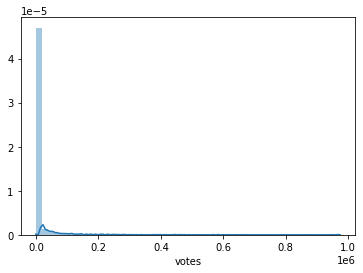

In [139]:
sns.distplot(final_dataset['votes'])

In [140]:
final_dataset.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Sci-Fi,Batman v Superman: Dawn of Justice,Fearing that the actions of Superman are left ...,6.4,642262
1,Action Adventure Fantasy,Suicide Squad,A secret government agency recruits some of th...,6.0,611523
2,Action Adventure Sci-Fi,Captain America: Civil War,Political involvement in the Avengers' affairs...,7.8,675546
3,Comedy Drama,Captain Fantastic,"In the forests of the Pacific Northwest, a fat...",7.9,194321
4,Action Adventure Comedy,Deadpool,A wisecracking mercenary gets experimented on ...,8.0,913350


In [141]:
final_dataset['original_title']=final_dataset['original_title'].apply(lambda x : x.lower())

In [142]:
final_dataset.head()

,genres,original_title,overview,ratings,votes
0,Action Adventure Sci-Fi,batman v superman: dawn of justice,Fearing that the actions of Superman are left ...,6.4,642262
1,Action Adventure Fantasy,suicide squad,A secret government agency recruits some of th...,6.0,611523
2,Action Adventure Sci-Fi,captain america: civil war,Political involvement in the Avengers' affairs...,7.8,675546
3,Comedy Drama,captain fantastic,"In the forests of the Pacific Northwest, a fat...",7.9,194321
4,Action Adventure Comedy,deadpool,A wisecracking mercenary gets experimented on ...,8.0,913350


In [143]:
final_dataset.dropna(how='any',inplace=True)

In [144]:
final_dataset.head(1)['overview']

0    Fearing that the actions of Superman are left ...
Name: overview, dtype: object

In [145]:
stop=set(stopwords.words('english'))
exclude=set(string.punctuation)
lemma=WordNetLemmatizer()

In [146]:
def clean(text):
    stop_free= " ".join([word for word in text.lower().split() if word not in stop])
    punc_free=" ".join([word for word in stop_free.split() if word not in exclude])
    normalized=" ".join([lemma.lemmatize(word) for word in punc_free.split()])

    return normalized

In [147]:
final_dataset['overview_new']=final_dataset['overview'].apply(lambda x: clean(x))

In [148]:
final_dataset[['overview','overview_new']].head()

,overview,overview_new
0,Fearing that the actions of Superman are left ...,"fearing action superman left unchecked, batman..."
1,A secret government agency recruits some of th...,secret government agency recruit dangerous inc...
2,Political involvement in the Avengers' affairs...,political involvement avengers' affair cause r...
3,"In the forests of the Pacific Northwest, a fat...","forest pacific northwest, father devoted raisi..."
4,A wisecracking mercenary gets experimented on ...,wisecracking mercenary get experimented become...


In [149]:
final_dataset.head()

,genres,original_title,overview,ratings,votes,overview_new
0,Action Adventure Sci-Fi,batman v superman: dawn of justice,Fearing that the actions of Superman are left ...,6.4,642262,"fearing action superman left unchecked, batman..."
1,Action Adventure Fantasy,suicide squad,A secret government agency recruits some of th...,6.0,611523,secret government agency recruit dangerous inc...
2,Action Adventure Sci-Fi,captain america: civil war,Political involvement in the Avengers' affairs...,7.8,675546,political involvement avengers' affair cause r...
3,Comedy Drama,captain fantastic,"In the forests of the Pacific Northwest, a fat...",7.9,194321,"forest pacific northwest, father devoted raisi..."
4,Action Adventure Comedy,deadpool,A wisecracking mercenary gets experimented on ...,8.0,913350,wisecracking mercenary get experimented become...


In [150]:
final_dataset.to_csv('Dataset For Recommendation.csv',index=False)